**Iris data set**

In [219]:
#Sihouette_Score
from sklearn import datasets
iris = datasets.load_iris()
iris
X = iris.data[:,:2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [220]:
#Apply standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(X)

**Dendrogram approach to find optimal clusters**

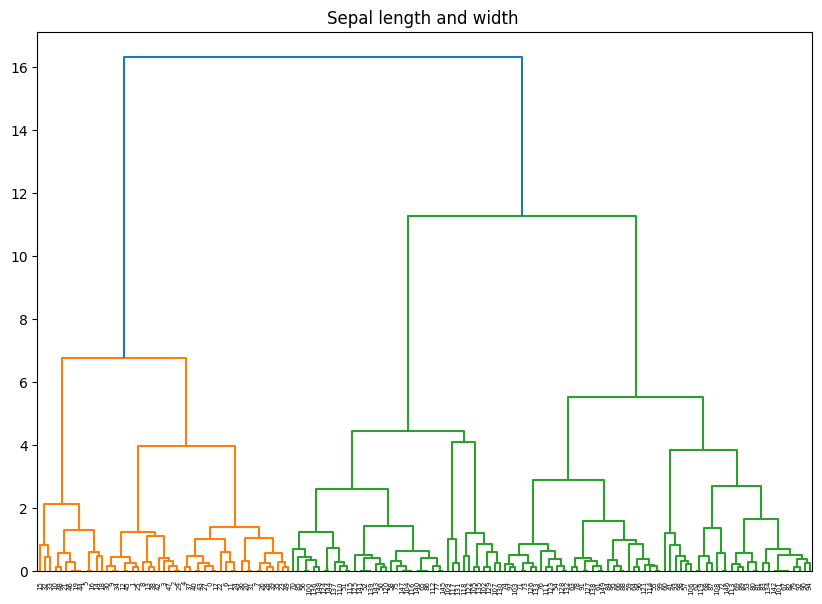

In [222]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Sepal length and width ')
dend=shc.dendrogram(shc.linkage(x,method='ward'))

In [154]:
x

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

In [223]:


from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster_labels = agglomerative.fit_predict(x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [224]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

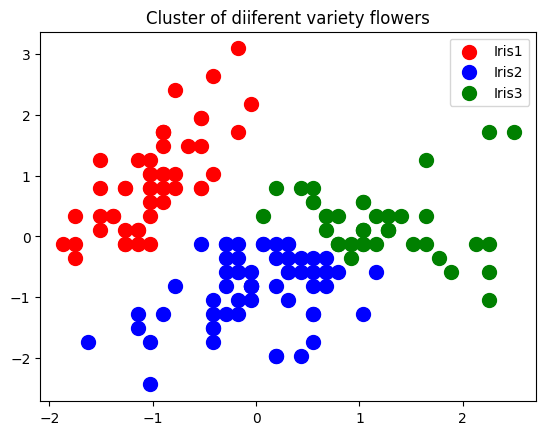

In [225]:
import matplotlib.pyplot as plt
plt.scatter(x[cluster_labels==0,0],x[cluster_labels==0,1],s=100,c='red',label='Iris1')
plt.scatter(x[cluster_labels==1,0],x[cluster_labels==1,1],s=100,c='blue',label='Iris2')
plt.scatter(x[cluster_labels==2,0],x[cluster_labels==2,1],s=100,c='green',label='Iris3')
plt.title('Cluster of diiferent variety flowers')
plt.legend()
plt.show()

**Silhouette score for finding optimal number of clusters**

In [229]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
n_clusters_range = range(2, 11)
silhouette_scores = []

for n_clusters in n_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters,affinity='euclidean',linkage='ward')
    cluster_labels = agglomerative.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)
optimal_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

In [230]:
optimal_n_clusters

2

In [231]:
hierarchical_cluster=AgglomerativeClustering(n_clusters=optimal_n_clusters, metric='euclidean',linkage='ward')
labels=hierarchical_cluster.fit_predict(x)

In [232]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

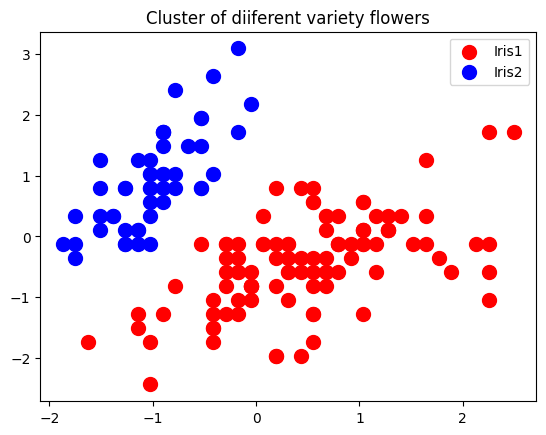

In [234]:
import matplotlib.pyplot as plt
plt.scatter(x[labels==0,0],x[labels==0,1],s=100,c='red',label='Iris1')
plt.scatter(x[labels==1,0],x[labels==1,1],s=100,c='blue',label='Iris2')
plt.title('Cluster of diiferent variety flowers')
plt.xlabel = ('SepalLength')
plt.ylabel = ('Sepal Width')

plt.legend()
plt.show()

**Mall Dataset**

In [184]:
 #Mall Dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [235]:
dataset=pd.read_csv("/content/mall.csv")

In [238]:
x=dataset.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [239]:
#Apply standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

**Dendrogram approach to find optimal cluster**

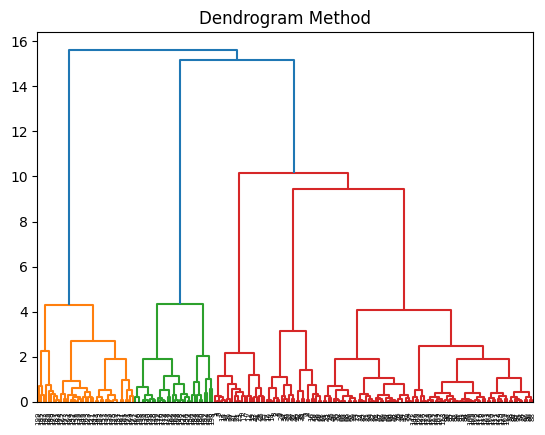

In [240]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(x, method='ward'))
plt.title('Dendrogram Method')
plt.xlabel=('Customer')  # Make sure plt.xlabel hasn't been reassigned
plt.ylabel=('Euclidean Distance')
plt.show()


In [249]:

#Perform clustering using optimal values for n
hierarchical_cluster=AgglomerativeClustering(n_clusters=5, metric='euclidean',linkage='ward')
y_hc=hierarchical_cluster.fit_predict(x)

In [250]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

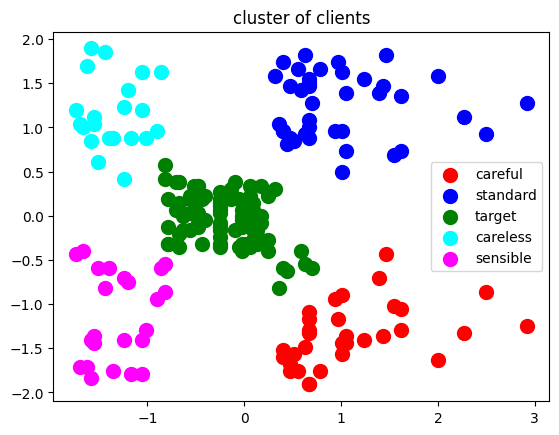

In [251]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c="red",label="careful")
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c="blue",label="standard")
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c="green",label="target")
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c="cyan",label="careless")
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c="magenta",label="sensible")
plt.title("cluster of clients")
plt.xlabel=("annual income k$")
plt.ylabel=("spending score(1-100)")
plt.legend()
plt.show()

**Silhouette score to find optimal cluster number**

In [252]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
n_clusters_range = range(2, 11)
silhouette_scores = []

for n_clusters in n_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters,affinity='euclidean',linkage='ward')
    cluster_labels = agglomerative.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)
optimal_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]
optimal_n_clusters

#Predict using optimal clusters

hierarchical_cluster=AgglomerativeClustering(n_clusters=optimal_n_clusters, metric='euclidean',linkage='ward')
y_hc=hierarchical_cluster.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

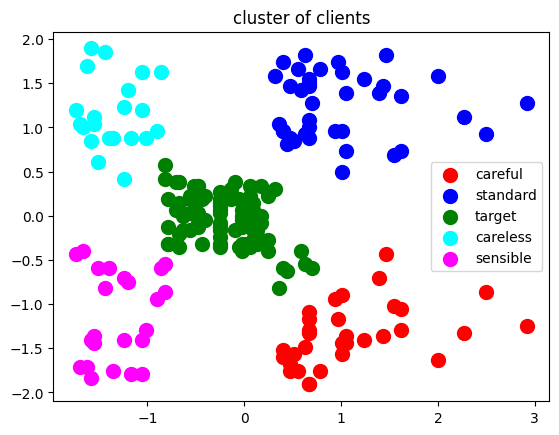

In [253]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c="red",label="careful")
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c="blue",label="standard")
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c="green",label="target")
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c="cyan",label="careless")
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c="magenta",label="sensible")
plt.title("cluster of clients")
plt.xlabel=("annual income k$")
plt.ylabel=("spending score(1-100)")
plt.legend()
plt.show()

**Simple dataset**

In [200]:
#simple data
x=[4,5,10,4,3,11,14,6,10,12]
y=[21,19,24,17,16,25,24,22,21,21]

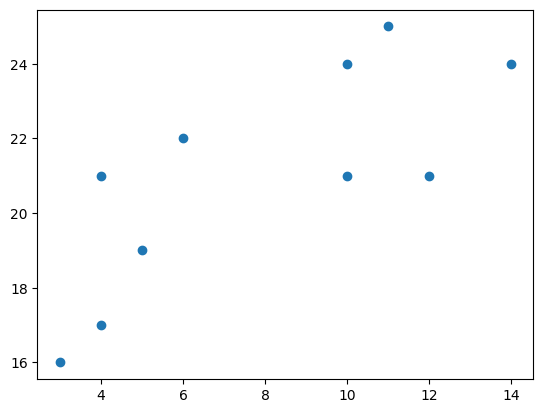

In [202]:
plt.scatter(x,y)
plt.show()

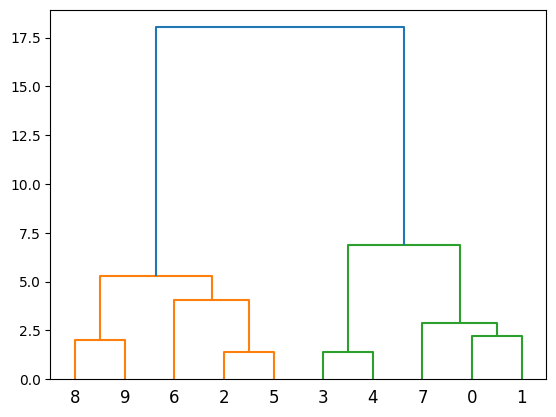

In [203]:
from scipy.cluster.hierarchy import dendrogram , linkage
data=list(zip(x,y))
linkage_data=linkage(data,method='ward',metric='euclidean')
dendrogram(linkage_data)

plt.show()

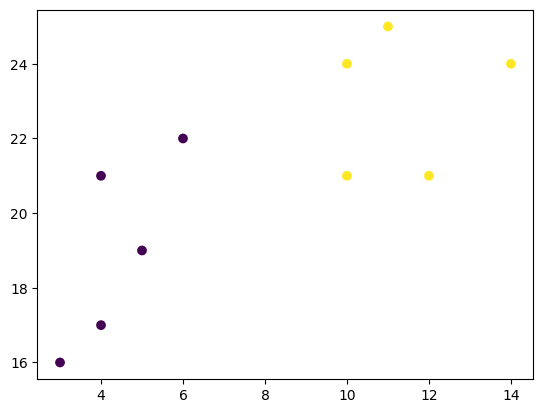

In [204]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster=AgglomerativeClustering(n_clusters=2, metric='euclidean',linkage='ward')
labels=hierarchical_cluster.fit_predict(data)
plt.scatter(x,y,c=labels)
plt.show()